In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('train.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#Korelasi Numerical To Categorical

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','y']
nums = ['age', 'balance', 'campaign', 'pdays', 'previous']
timestamp = ['day', 'month', 'duration']

In [ ]:
from scipy.stats import f_oneway

# Pisahkan data berdasarkan kategori target
for feature in ['age', 'balance', 'campaign', 'pdays', 'previous']:
    grouped_data = [df[feature][df['y'] == category] for category in df['y'].unique()]

    # Lakukan uji ANOVA
    anova_result = f_oneway(*grouped_data)

    # Tampilkan hasil uji ANOVA
    print(f"Hasil Uji ANOVA untuk {feature}:")
    print("Statistik Uji F:", anova_result.statistic)
    print("p-value:", anova_result.pvalue)

    # Interpretasi hasil uji ANOVA
    if anova_result.pvalue < 0.05:
        print(f"Terdapat perbedaan signifikan dalam rata-rata {feature} antara kelompok target.")
    else:
        print(f"Tidak terdapat perbedaan signifikan dalam rata-rata {feature} antara kelompok target.")


Hasil Uji ANOVA untuk age:
Statistik Uji F: 28.625233091728465
p-value: 8.825643691900577e-08
Terdapat perbedaan signifikan dalam rata-rata age antara kelompok target.
Hasil Uji ANOVA untuk balance:
Statistik Uji F: 126.57227551143087
p-value: 2.5211136918594683e-29
Terdapat perbedaan signifikan dalam rata-rata balance antara kelompok target.
Hasil Uji ANOVA untuk campaign:
Statistik Uji F: 243.3584044347332
p-value: 1.0123473642068786e-54
Terdapat perbedaan signifikan dalam rata-rata campaign antara kelompok target.
Hasil Uji ANOVA untuk pdays:
Statistik Uji F: 490.69656268092456
p-value: 3.79055331945749e-108
Terdapat perbedaan signifikan dalam rata-rata pdays antara kelompok target.
Hasil Uji ANOVA untuk previous:
Statistik Uji F: 396.4439894423845
p-value: 7.801830349772383e-88
Terdapat perbedaan signifikan dalam rata-rata previous antara kelompok target.


Feature Selection:

Jika uji ANOVA menunjukkan perbedaan signifikan untuk suatu fitur, Anda dapat mempertimbangkan fitur tersebut untuk dimasukkan ke dalam analisis atau model lebih lanjut.

# Handle missing values

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat missing values pada dataset

In [ ]:
missing_data = df[(df['poutcome'] == 'unknown') & (df['pdays'] != -1)]

missing_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40658,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes
41821,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,no
42042,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes
43978,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,no
45021,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,no


In [ ]:
mask = ~((df['poutcome'] == 'unknown') & (df['pdays'] != -1))

df = df[mask]

Hapus data unknown yang missing values dari poutcome dan tinggalkan unknown yang client belum pernah dikontak

In [ ]:
df['poutcome'].replace({'unknown': 'never'}, inplace=True)

<ipython-input-43-373e7950109a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome'].replace({'unknown': 'never'}, inplace=True)


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,never,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,never,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,never,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,never,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,never,no


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9456
technician       7596
admin.           5170
services         4154
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27211
single      12788
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23199
tertiary     13299
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44391
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25128
no     20078
Name: housing, dtype: int64

Value count kolom loan:
no     37964
yes     7242
Name: loan, dtype: int64

Value count kolom contact:
cellular     29280
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom poutcome:
never      36954
failure     4901
other       1840
success   

# Handle duplicated data

In [ ]:
df.duplicated().sum()

0

Tidak terdapat duplicated values pada dataset

# Handle outliers

In [ ]:
nums2 = ['age','campaign']
for num in nums2:
  df[num] = np.log(df[num])


In [ ]:
from scipy import stats

print("Before removing outlier: ", len(df))

for num in nums2:
  z_scores = np.abs(stats.zscore(df[num]))
  df = df[z_scores < 3]

print("After removing outlier: ", len(df))

Before removing outlier:  45206
After removing outlier:  44785


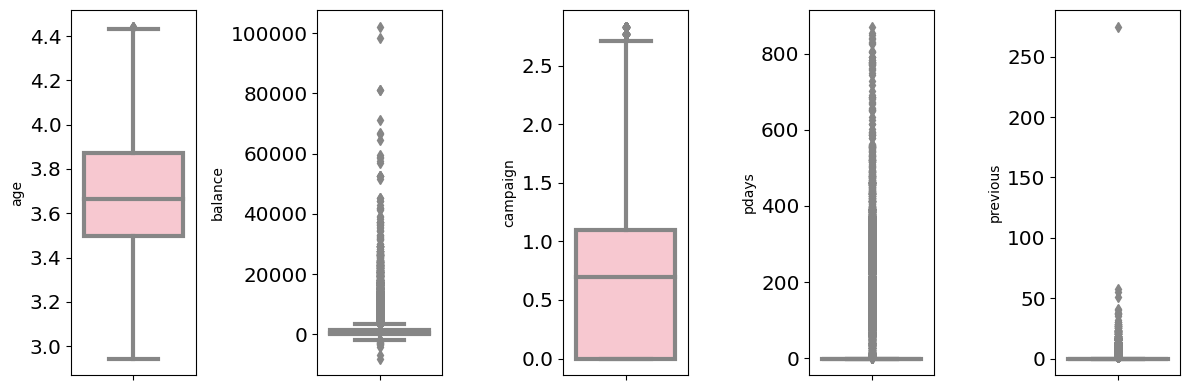

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='pink', orient='v')
    plt.tight_layout()

# Feature transformation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(['y'], axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(f'Number of Train Data: {y_train.shape[0]}')
print(f'Number of Test Data: {y_test.shape[0]}')


Number of Train Data: 35828
Number of Test Data: 8957


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['age', 'balance', 'campaign', 'pdays', 'previous']
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])
print("DataFrame setelah distandardisasi:")
X_train.head()

DataFrame setelah distandardisasi:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
21317,1.361460,blue-collar,married,primary,no,0.600859,no,no,cellular,18,aug,129,0.605778,-0.413502,-0.24294,never
312,1.290341,services,divorced,primary,no,-0.414293,yes,yes,unknown,5,may,311,0.007243,-0.413502,-0.24294,never
10060,0.753023,entrepreneur,married,secondary,no,-0.260225,no,no,unknown,11,jun,148,1.030445,-0.413502,-0.24294,never
34801,0.585039,entrepreneur,married,tertiary,no,7.781351,yes,yes,cellular,6,may,72,-1.015958,-0.413502,-0.24294,never
7916,-0.972674,unemployed,divorced,primary,no,-0.445629,yes,no,unknown,30,may,745,2.652181,-0.413502,-0.24294,never


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1864,-1.374413,technician,single,secondary,no,-0.486431,yes,no,unknown,9,may,67,0.605778,-0.413502,-0.242940,never
36097,0.834408,admin.,divorced,secondary,no,-0.514829,yes,yes,cellular,11,may,469,-1.015958,3.070077,0.171243,failure
3548,0.225970,technician,single,secondary,no,-0.000398,yes,no,unknown,15,may,1867,1.628979,-0.413502,-0.242940,never
35615,-1.666920,technician,married,secondary,no,-0.276546,yes,no,cellular,7,may,189,0.605778,-0.413502,-0.242940,never
22787,-0.972674,management,married,tertiary,no,0.420025,no,no,cellular,25,aug,9,2.227514,-0.413502,-0.242940,never


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44785 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44785 non-null  float64
 1   job        44785 non-null  object 
 2   marital    44785 non-null  object 
 3   education  44785 non-null  object 
 4   default    44785 non-null  object 
 5   balance    44785 non-null  int64  
 6   housing    44785 non-null  object 
 7   loan       44785 non-null  object 
 8   contact    44785 non-null  object 
 9   day        44785 non-null  int64  
 10  month      44785 non-null  object 
 11  duration   44785 non-null  int64  
 12  campaign   44785 non-null  float64
 13  pdays      44785 non-null  int64  
 14  previous   44785 non-null  int64  
 15  poutcome   44785 non-null  object 
 16  y          44785 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 6.2+ MB


# Feature encoding

cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','y']

In [ ]:
mapping_default = {
    'no' : 0,
    'yes' : 1,
    }
X_train['default'] = X_train['default'].map(mapping_default)
X_test['default'] = X_test['default'].map(mapping_default)

In [ ]:
mapping_housing = {
    'no' : 0,
    'yes' : 1,
    }
X_train['housing'] = X_train['housing'].map(mapping_housing)
X_test['housing'] = X_test['housing'].map(mapping_housing)

In [ ]:
mapping_loan = {
    'no' : 0,
    'yes' : 1,
    }
X_train['loan'] = X_train['loan'].map(mapping_loan)
X_test['loan'] = X_test['loan'].map(mapping_loan)

In [ ]:
X_train_encoded_education = pd.get_dummies(X_train['education'], prefix = 'pendidikan')
X_test_encoded_education = pd.get_dummies(X_test['education'], prefix = 'pendidikan')

In [ ]:
X_train_encoded_kerja = pd.get_dummies(X_train['job'], prefix = 'kerja')
X_test_encoded_kerja = pd.get_dummies(X_test['job'], prefix = 'kerja')

In [ ]:
X_train_encoded_marital = pd.get_dummies(X_train['marital'], prefix = 'status')
X_test_encoded_marital = pd.get_dummies(X_test['marital'], prefix = 'status')

In [ ]:
X_train_encoded_contact = pd.get_dummies(X_train['contact'], prefix = 'contact')
X_test_encoded_contact = pd.get_dummies(X_test['contact'], prefix = 'contact')

In [ ]:
X_train_encoded_poutcome = pd.get_dummies(X_train['poutcome'], prefix = 'poutcome')
X_test_encoded_poutcome = pd.get_dummies(X_test['poutcome'], prefix = 'poutcome')

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
21317,1.361460,blue-collar,married,primary,0,0.600859,0,0,cellular,18,aug,129,0.605778,-0.413502,-0.24294,never
312,1.290341,services,divorced,primary,0,-0.414293,1,1,unknown,5,may,311,0.007243,-0.413502,-0.24294,never
10060,0.753023,entrepreneur,married,secondary,0,-0.260225,0,0,unknown,11,jun,148,1.030445,-0.413502,-0.24294,never
34801,0.585039,entrepreneur,married,tertiary,0,7.781351,1,1,cellular,6,may,72,-1.015958,-0.413502,-0.24294,never
7916,-0.972674,unemployed,divorced,primary,0,-0.445629,1,0,unknown,30,may,745,2.652181,-0.413502,-0.24294,never


In [ ]:
X_train_combined = pd.concat([X_train, X_train_encoded_education, X_train_encoded_kerja,X_train_encoded_marital,X_train_encoded_contact, X_train_encoded_poutcome], axis=1)
X_test_combined = pd.concat([X_test, X_test_encoded_education, X_test_encoded_kerja,X_test_encoded_marital,X_test_encoded_contact, X_test_encoded_poutcome], axis=1)

In [ ]:
X_train_combined = X_train_combined.drop(['job','education', 'marital','contact','month','poutcome'], axis=1)

In [ ]:
X_test_combined = X_test_combined.drop(['job','education','marital','contact','month','poutcome'], axis=1)

In [ ]:
X_train_combined.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,status_divorced,status_married,status_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_never,poutcome_other,poutcome_success
21317,1.361460,0,0.600859,0,0,18,129,0.605778,-0.413502,-0.24294,...,0,1,0,1,0,0,0,1,0,0
312,1.290341,0,-0.414293,1,1,5,311,0.007243,-0.413502,-0.24294,...,1,0,0,0,0,1,0,1,0,0
10060,0.753023,0,-0.260225,0,0,11,148,1.030445,-0.413502,-0.24294,...,0,1,0,0,0,1,0,1,0,0
34801,0.585039,0,7.781351,1,1,6,72,-1.015958,-0.413502,-0.24294,...,0,1,0,1,0,0,0,1,0,0
7916,-0.972674,0,-0.445629,1,0,30,745,2.652181,-0.413502,-0.24294,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
X_train_combined.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'pendidikan_primary',
       'pendidikan_secondary', 'pendidikan_tertiary', 'pendidikan_unknown',
       'kerja_admin.', 'kerja_blue-collar', 'kerja_entrepreneur',
       'kerja_housemaid', 'kerja_management', 'kerja_retired',
       'kerja_self-employed', 'kerja_services', 'kerja_student',
       'kerja_technician', 'kerja_unemployed', 'kerja_unknown',
       'status_divorced', 'status_married', 'status_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_never', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [ ]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35828 entries, 21317 to 15947
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   35828 non-null  float64
 1   default               35828 non-null  int64  
 2   balance               35828 non-null  float64
 3   housing               35828 non-null  int64  
 4   loan                  35828 non-null  int64  
 5   day                   35828 non-null  int64  
 6   duration              35828 non-null  int64  
 7   campaign              35828 non-null  float64
 8   pdays                 35828 non-null  float64
 9   previous              35828 non-null  float64
 10  pendidikan_primary    35828 non-null  uint8  
 11  pendidikan_secondary  35828 non-null  uint8  
 12  pendidikan_tertiary   35828 non-null  uint8  
 13  pendidikan_unknown    35828 non-null  uint8  
 14  kerja_admin.          35828 non-null  uint8  
 15  kerja_blue-coll

<Axes: >

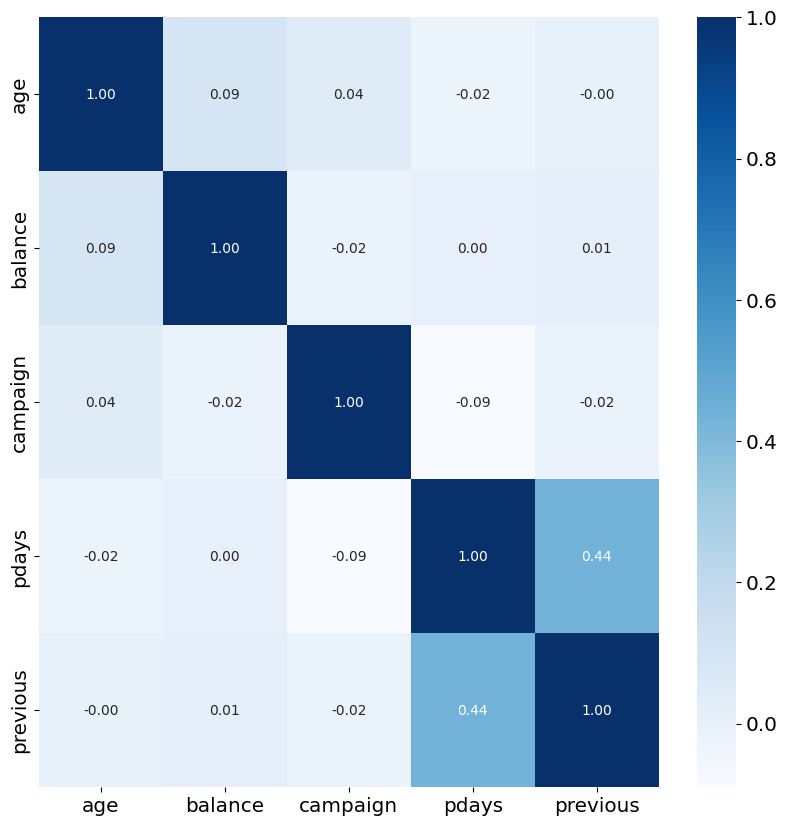

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_combined[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
cats2 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome']

<Axes: >

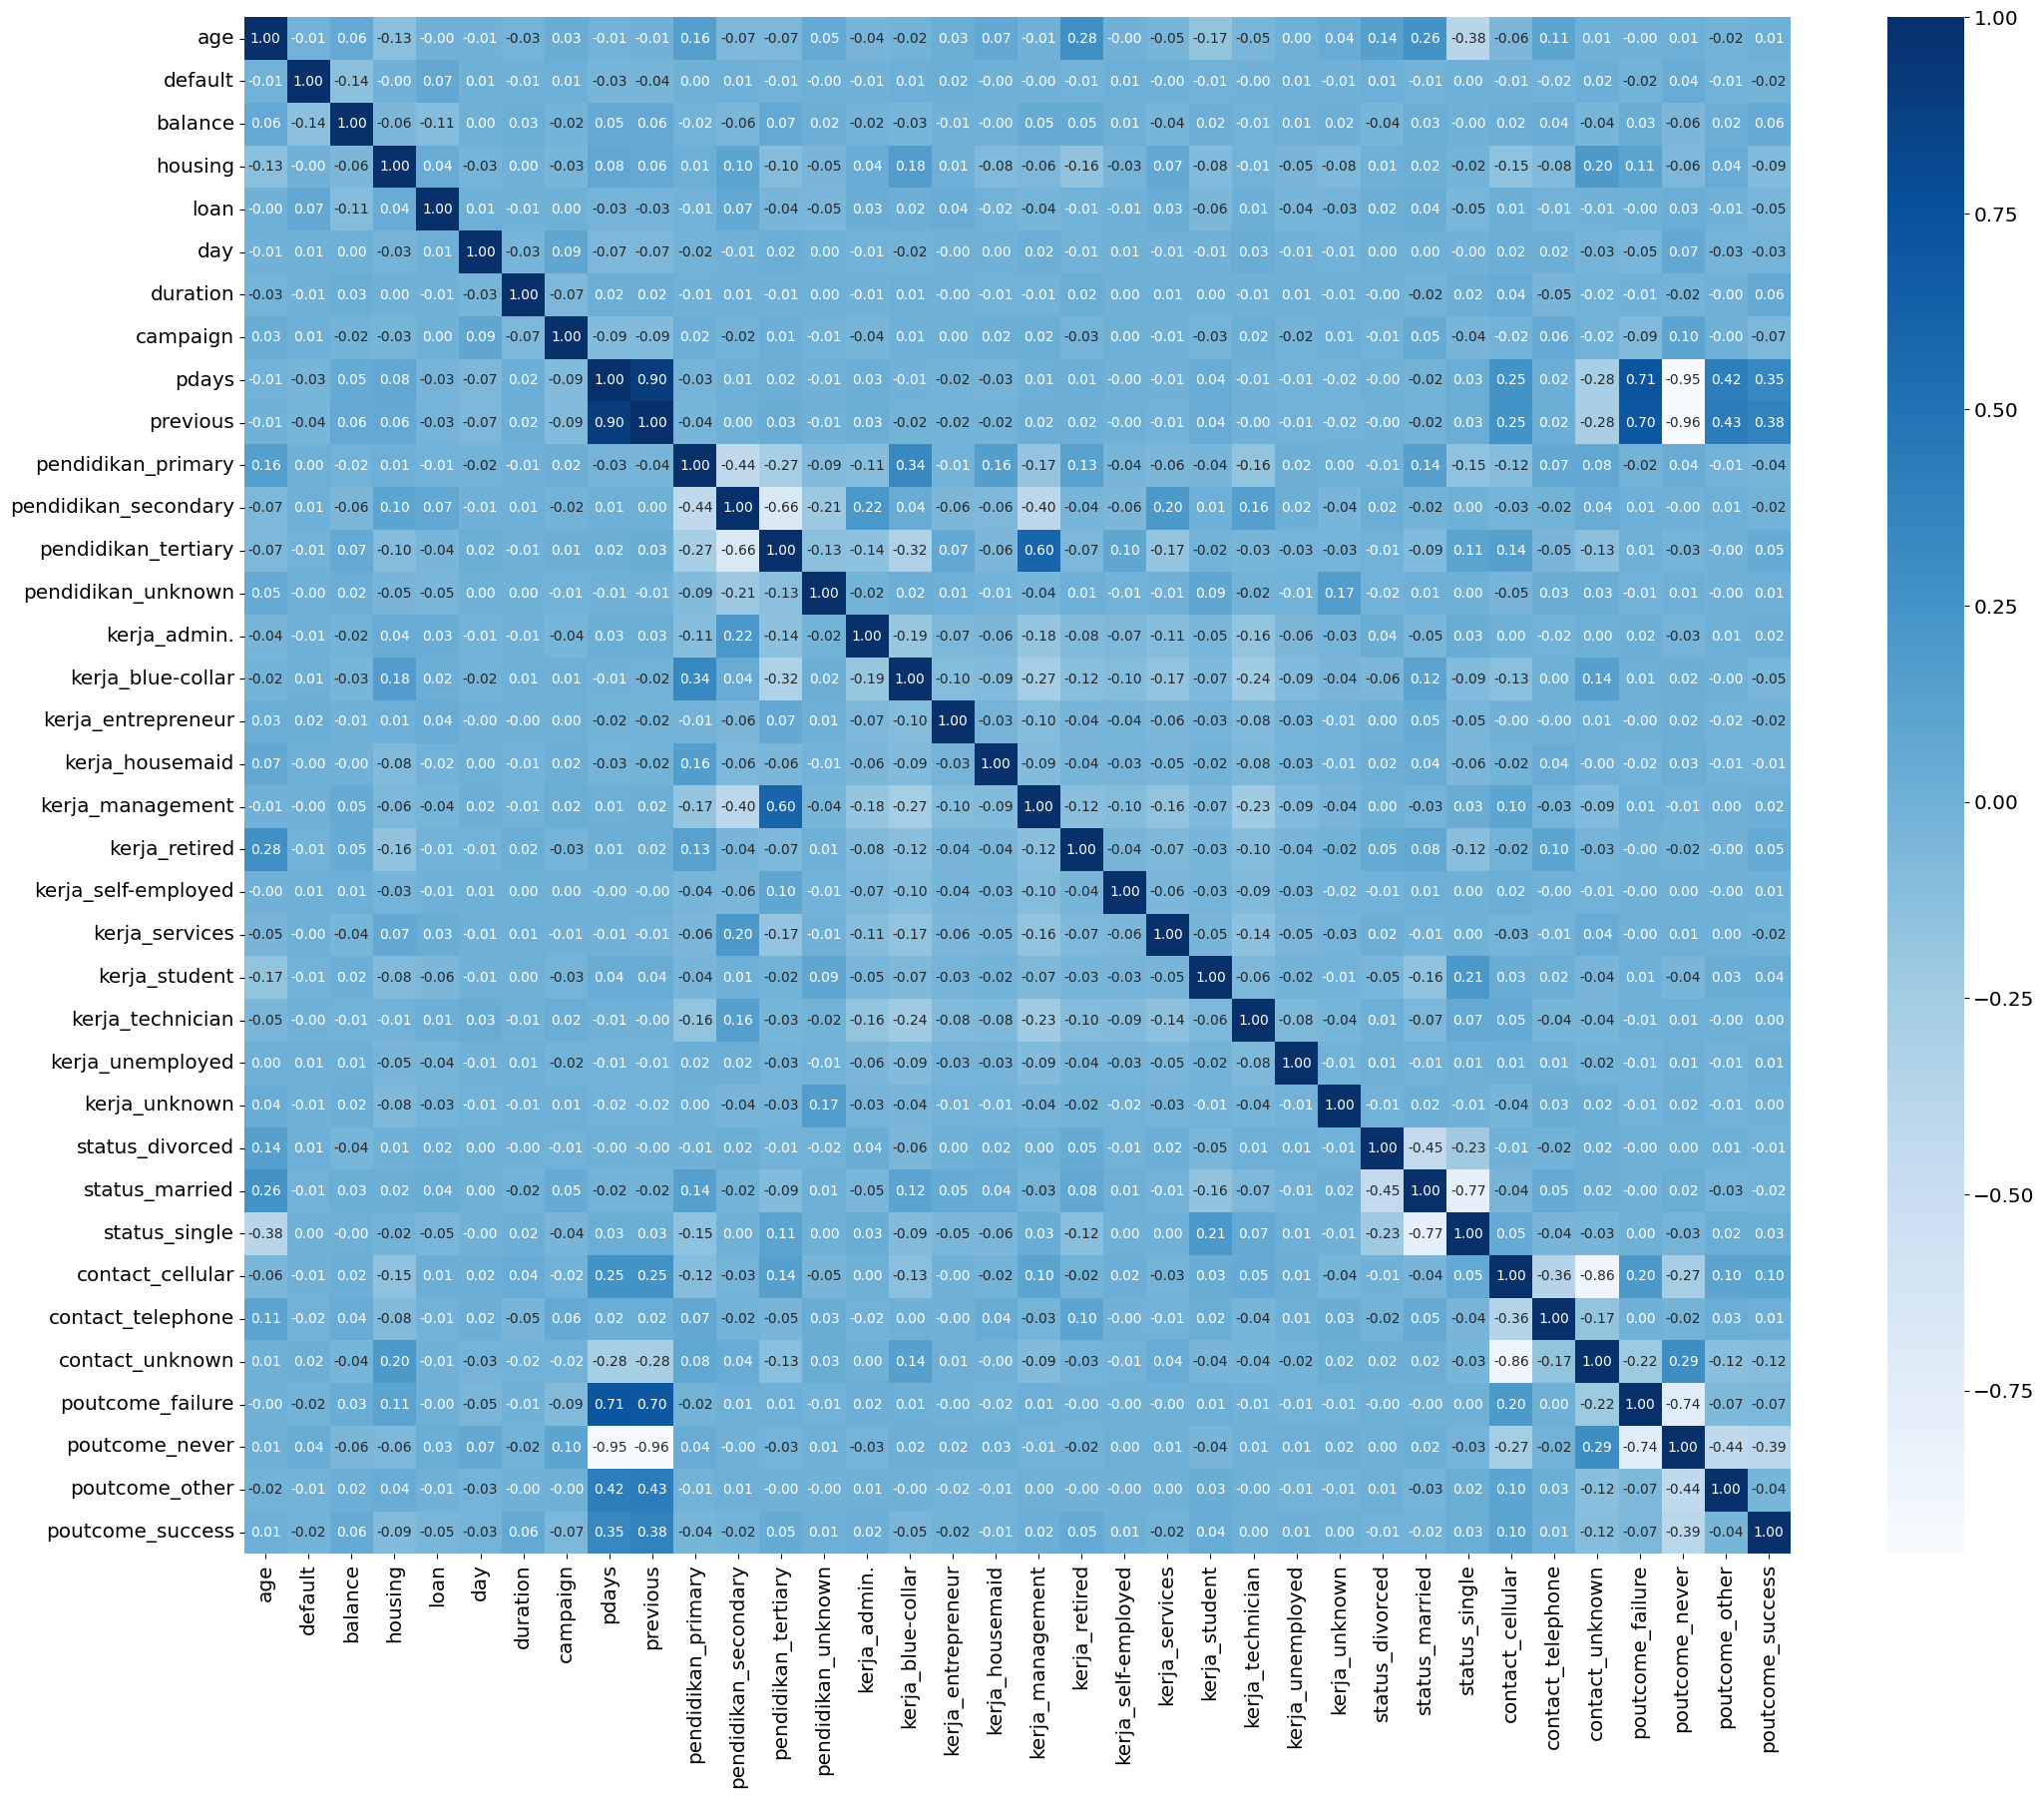

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(X_train_combined.corr(method='kendall'), cmap='Blues', annot=True, fmt='.2f')

# Handle class imbalance

In [ ]:
y_train.value_counts()

no     31599
yes     4229
Name: y, dtype: int64

In [ ]:
# OVERSAMPLING
from imblearn import over_sampling
X_oversampling , y_oversampling = over_sampling.SMOTE(random_state=42).fit_resample(X_train_combined,y_train)
print(pd.Series(y_oversampling).value_counts())

no     31599
yes    31599
Name: y, dtype: int64
